##Target photons spectrum (EBL + CMB)

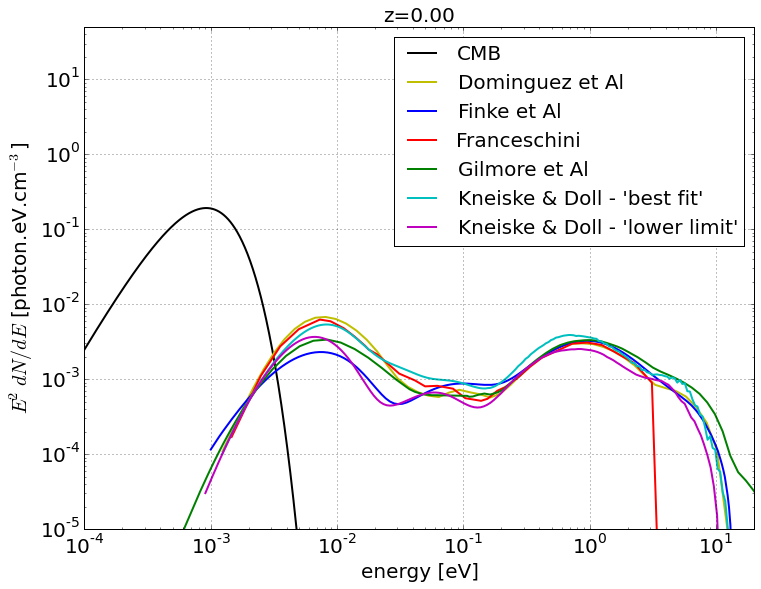

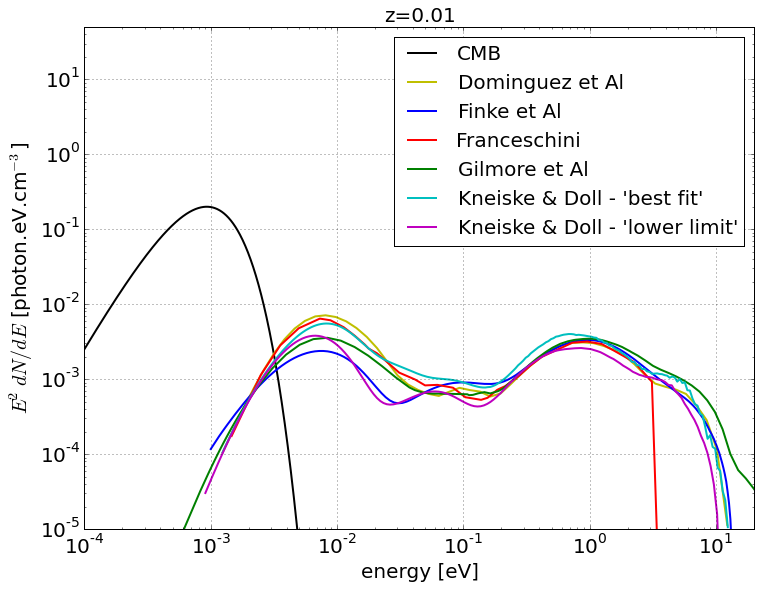

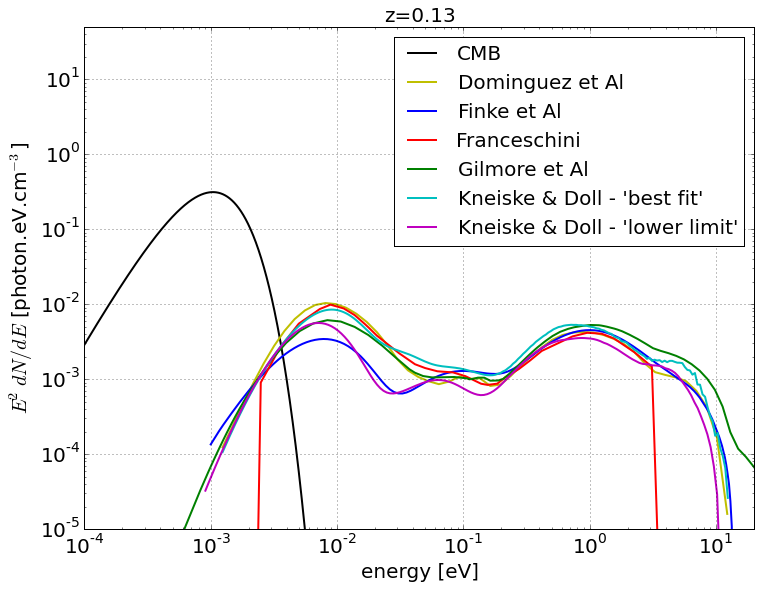

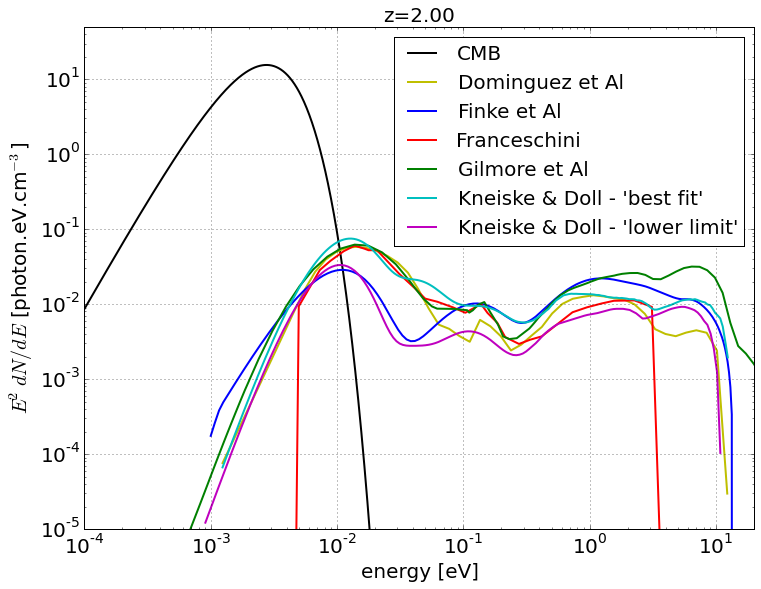

In [2]:
%matplotlib inline
from numpy import loadtxt, size, pi, exp, logspace
from matplotlib.pyplot import figure, show, savefig
from src.analytic import *
from src.read import path_to_fig_dir

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['ps.fonttype'] = 42

def nCMB(E,z):
   kTcmb = k*Tcmb*erg*(1+z)
   return (hb*c*erg)**(-3) *(E/pi)**2 /(exp(E/kTcmb)-1)    

redshifts       =[0,0.01,0.13,2]
# always take line number (column 0 for h.nu)
ind_dominguez   =[1,3,5,15]     # see z_Dominguez.dat
ind_lower_limit =[1,54,108,179] # see z_IR.dat 
ind_franceschini=[1,1,2,11]     # step of 0.2 (11 redshifts)
ind_finke       =[1,2,14,201]   # step of 0.01 (500 redshifts)
ind_gilmore     =[1,3,6,14]     # see z_IR_gil.dat 
ind_best_fit    =[1,1,6,81] 

figs = [figure(figsize=(12,9)),figure(figsize=(12,9)),figure(figsize=(12,9)),figure(figsize=(12,9))]

i=0
for z in redshifts:
    ax = figs[i].add_subplot(111)
   
    #==== CMB ====
    hv = logspace(-4,-1,1000)
    ax.plot(hv,nCMB(hv,z)*hv**2,"-k",linewidth=2,label="CMB")

    # ==== Dominguez ====
    lamb,lambdaI = loadtxt("EBL_files/lambdaI_Dominguez.dat",unpack=True,usecols=[0,ind_dominguez[i]])
    hv = h*c/(lamb*1e-4)  # erg
    density = 1e-6*(4*pi/c)*lambdaI/(hv**2) /(erg) *(1+z)**3
    hv = hv *erg
    ax.plot(hv,density*hv**2,"-y",linewidth=2,label="Dominguez et Al")
 
    # ==== Finke ====
    hv,density = loadtxt("EBL_files/n_Finke.dat",unpack=True,usecols=[0,ind_finke[i]])
    ax.plot(hv,density*(1+z)**3*hv**2,"-b",linewidth=2,label="Finke et Al")
      
    # ==== Fransceschini ====
    hv,density = loadtxt("EBL_files/n_Fra.dat",unpack=True,usecols=[0,ind_franceschini[i]])
    ax.plot(hv,density*(1+z)**3*hv**2,"-r",linewidth=2,label="Franceschini")

    # ==== Gilmore ====
    hv,density = loadtxt("EBL_files/n_Gil.dat",unpack=True,usecols=[0,ind_gilmore[i]])
    ax.plot(hv,density*hv**2,"-g",linewidth=2,label="Gilmore et Al")
      
    # ==== Kneiske and Doll - "best fit" ====
    hv,density = loadtxt("EBL_files/n_bestfit10.dat",unpack=True,usecols=[0,ind_best_fit[i]])    
    ax.plot(hv,density*(1+z)**3*hv**2,"-c",linewidth=2,label="Kneiske & Doll - 'best fit'")

    # ==== Kneiske and Doll - "lower limit" ====
    hv,density = loadtxt("EBL_files/n_lowerlimit10.dat",unpack=True,usecols=[0,ind_lower_limit[i]])
    ax.plot(hv,density*(1+z)**3*hv**2,"-m",linewidth=2,label="Kneiske & Doll - 'lower limit'")

    ax.set_title("z=%.2f"%z,fontsize=20)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([1e-4,20])
    ax.set_ylim([1e-5,50])
    ax.grid(b=True,which='major')
    ax.legend(loc="best",fontsize=20)#,frameon=False,framealpha=0.5)
    ax.set_xlabel("energy [eV]",fontsize=20)
    ax.set_ylabel("$E^2 dN/dE$ [photon.eV.cm$^{-3}$]",fontsize=20)
    
    savefig(path_to_fig_dir+"ExtragalacticLight.eps",bbox_inches='tight')  
      
    i+=1

show()

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: RuntimeWarning: overflow encountered in exp


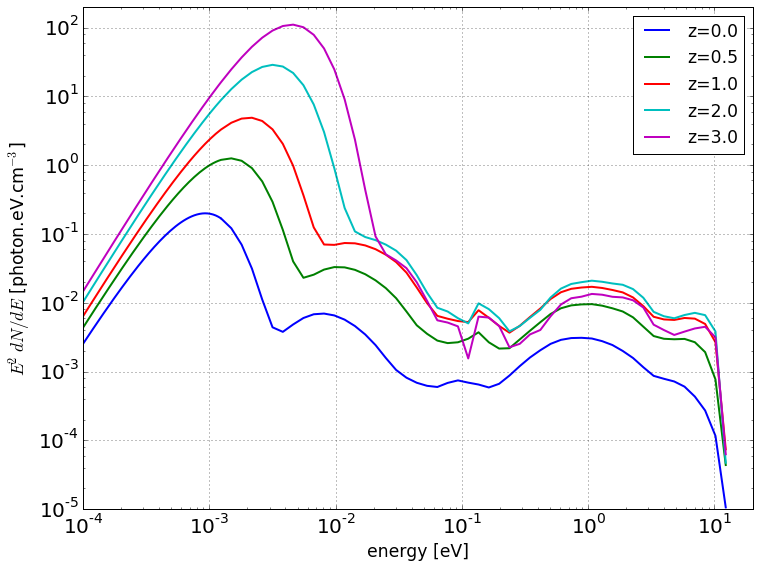

In [3]:
from numpy import log10, append

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['ps.fonttype'] = 42

#==== Dominguez vs redshift ==================================================================
fig2 = figure(figsize=(12,9))
ax2 = fig2.add_subplot(111)

z = loadtxt("EBL_files/z_Dominguez.dat",unpack=True,usecols=[0])
for z_index in [1,9,12,15,17]:
   lamb,lambdaI = loadtxt("EBL_files/lambdaI_Dominguez.dat",unpack=True,usecols=[0,z_index])
   hv = h*c/(lamb*1e-4)  # erg
   density = 1e-6*(4*pi/c)*lambdaI/(hv**2) /erg *(1+z[z_index])**3
   hv = hv[::-1] *erg
   #p=ax2.plot(hv,density*hv**2,"--",linewidth=2)
   # CMB
   E = logspace(-5,log10(min(hv)),100)
   ntot = append(nCMB(E,z[z_index])*E**2,density[::-1]*hv**2 + nCMB(hv,z[z_index])*hv**2)
   E = append(E,hv)
   ax2.plot(E,ntot,linewidth=2,label="z="+str(z[z_index-1]))
   #ax2.plot(hv,nCMB(hv,z[z_index])*hv**2,color=p[0].get_color(),linestyle='-',linewidth=2,label="z="+str(z[z_index-1]))

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([1e-4,20])
ax2.set_ylim([1e-5,2e2])
ax2.grid(b=True,which='major')
ax2.legend(loc="best",fontsize="xx-large")#,frameon=False,framealpha=0.5)
ax2.set_xlabel("energy [eV]",fontsize="xx-large")
ax2.set_ylabel("$E^2 dN/dE$ [photon.eV.cm$^{-3}$]",fontsize="xx-large")

show()

## Test EBL photon drawing in the simulation

## $d\tau/dx (\lambda_{\gamma\gamma})$

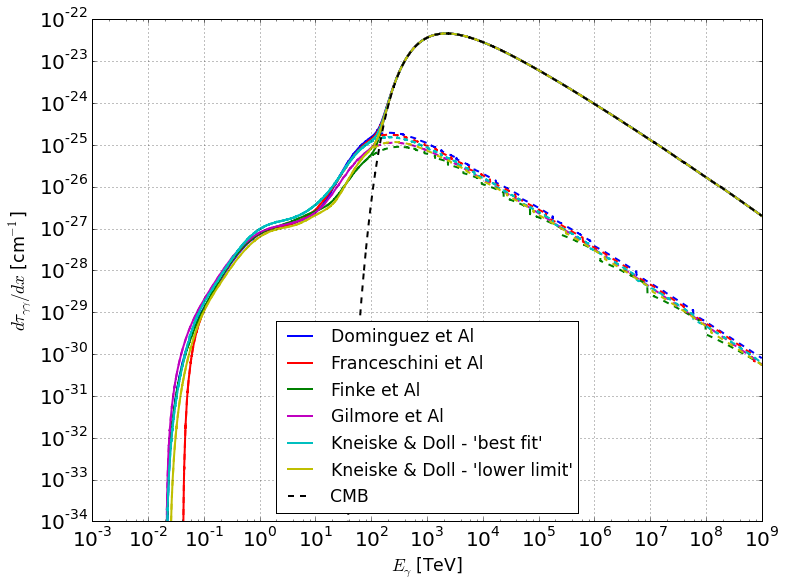

In [4]:
%matplotlib inline
from numpy import loadtxt
from  matplotlib.pyplot import figure, show
from src.analytic import r0, pi, me, erg, m, c

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

ax = figure(figsize=(12,9)).add_subplot(111)

# ==== Dominguez ====
E,dtaudx,dtaudxEBL,dtaudxCMB = loadtxt("Results/dtaudx-Dominguez.dat",unpack=True,usecols=[0,1,2,3])
ax.plot(E,dtaudx,"-b",linewidth=2,label="Dominguez et Al")
ax.plot(E,dtaudxEBL,"--b",linewidth=2)

# ==== Fransceschini ====
E,dtaudx,dtaudxEBL,dtaudxCMB = loadtxt("Results/dtaudx-Franceschini.dat",unpack=True,usecols=[0,1,2,3])
ax.plot(E,dtaudx,"-r",linewidth=2,label="Franceschini et Al")
ax.plot(E,dtaudxEBL,"--r",linewidth=2)

# ==== Finke ====
E,dtaudx,dtaudxEBL,dtaudxCMB = loadtxt("Results/dtaudx-Finke.dat",unpack=True,usecols=[0,1,2,3])
ax.plot(E,dtaudx,"-g",linewidth=2,label="Finke et Al")
ax.plot(E,dtaudxEBL,"--g",linewidth=2)

# ==== Gilmore ====
E,dtaudx,dtaudxEBL,dtaudxCMB = loadtxt("Results/dtaudx-Gilmore.dat",unpack=True,usecols=[0,1,2,3])
ax.plot(E,dtaudx,"-m",linewidth=2,label="Gilmore et Al")
ax.plot(E,dtaudxEBL,"--m",linewidth=2)
      
# ==== Kneiske and Doll - "best fit" ====
E,dtaudx,dtaudxEBL,dtaudxCMB = loadtxt("Results/dtaudx-Best_fit.dat",unpack=True,usecols=[0,1,2,3])
ax.plot(E,dtaudx,"-c",linewidth=2,label="Kneiske & Doll - 'best fit'")
ax.plot(E,dtaudxEBL,"--c",linewidth=2)

# ==== Kneiske and Doll - "lower limit" ====
E,dtaudx,dtaudxEBL,dtaudxCMB = loadtxt("Results/dtaudx-Lower_limit.dat",unpack=True,usecols=[0,1,2,3])
ax.plot(E,dtaudx,"-y",linewidth=2,label="Kneiske & Doll - 'lower limit'")
ax.plot(E,dtaudxEBL,"--y",linewidth=2)


ax.plot(E,dtaudxCMB,"--k",linewidth=2,label="CMB")

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-34,1e-22])
ax.grid(b=True,which='major')
ax.legend(loc="best",fontsize="xx-large")#,frameon=False,framealpha=0.5)
ax.set_xlabel("$E_{\\gamma}$ [TeV]",fontsize="xx-large")
ax.set_ylabel("$d\\tau_{\\gamma\\gamma}/dx$ [cm$^{-1}$]",fontsize="xx-large")

show()

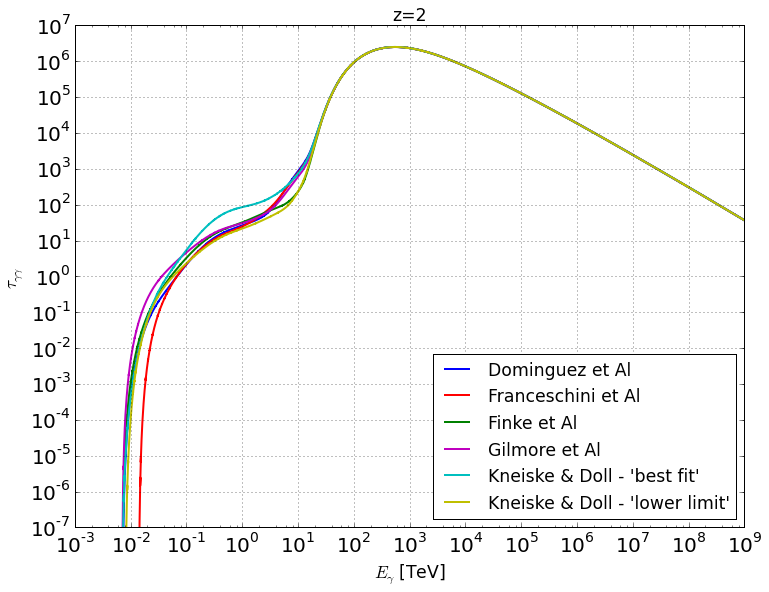

In [15]:
%matplotlib inline
from numpy import loadtxt
from  matplotlib.pyplot import figure, show
from modules.analytic import r0, pi, me, erg, m, c

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

ax = figure(figsize=(12,9)).add_subplot(111)

# ==== Dominguez ====
E,tau = loadtxt("Results/dtaudx-Dominguez.dat",unpack=True,usecols=[0,4])
ax.plot(E,tau,"-b",linewidth=2,label="Dominguez et Al")

# ==== Fransceschini ====
E,tau = loadtxt("Results/dtaudx-Franceschini.dat",unpack=True,usecols=[0,4])
ax.plot(E,tau,"-r",linewidth=2,label="Franceschini et Al")

# ==== Finke ====
E,tau = loadtxt("Results/dtaudx-Finke.dat",unpack=True,usecols=[0,4])
ax.plot(E,tau,"-g",linewidth=2,label="Finke et Al")

# ==== Gilmore ====
E,tau = loadtxt("Results/dtaudx-Gilmore.dat",unpack=True,usecols=[0,4])
ax.plot(E,tau,"-m",linewidth=2,label="Gilmore et Al")

# ==== Kneiske and Doll - "best fit" ====
E,tau = loadtxt("Results/dtaudx-Best_fit.dat",unpack=True,usecols=[0,4])
ax.plot(E,tau,"-c",linewidth=2,label="Kneiske & Doll - 'best fit'")

# ==== Kneiske and Doll - "lower limit" ====
E,tau = loadtxt("Results/dtaudx-Lower_limit.dat",unpack=True,usecols=[0,4])
ax.plot(E,tau,"-y",linewidth=2,label="Kneiske & Doll - 'lower limit'")
  
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-7,1e7])
ax.grid(b=True,which='major')
ax.legend(loc="best",fontsize="xx-large")#,frameon=False,framealpha=0.5)
ax.set_title("z=2",fontsize="xx-large")
ax.set_xlabel("$E_{\\gamma}$ [TeV]",fontsize="xx-large")
ax.set_ylabel("$\\tau_{\\gamma\\gamma}$",fontsize="xx-large")

show()

## Distance of absorption ($\lambda_{\gamma\gamma}$)

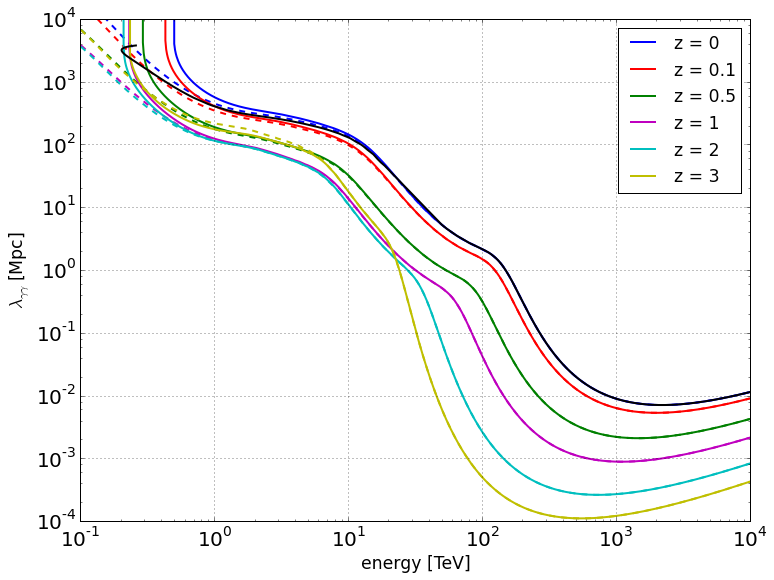

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
from numpy import *
from scipy.integrate import quad
from src.analytic import Ethreshold_gg, distance
from src.read import path_to_fig_dir

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['ps.fonttype'] = 42

c=2.99792458e10 # cm.s-1
Mpc=(3.0856776e+16)*1e8 # Mpc to cm
H0=67.8*1e5/(Mpc) # s-1
omegaM = 0.3
omegaK = 0
omegaL = 0.7
zlim=-0.
def properIntegrand(z):
   return -c/(H0*(1+z)*sqrt(omegaM*(1+z)**3+omegaK*(1+z)**2+omegaL))
def comobileIntegrand(z):
   return -c/(H0*sqrt(omegaM*(1+z)**3+omegaK*(1+z)**2+omegaL))
   
color=['b','r','g','m','c','y']

# Proper distance figure
#========================
fig1 = plt.figure(figsize=(12,9))
ax11 = fig1.add_subplot(111)

labels=["0","0.1","0.5","1","2","3"]
theory=[1,3,4,5,6,7]
ind=0
for lab in labels:
   # theoritical curve ===================================================
   # f: without cosmo
   # g: with cosmo
   e,f,g=loadtxt('Results/lambda_e.dat',unpack=True,usecols=[0,int(theory[ind]),int(theory[ind])+7])
   e = e*511.e3/1.e12 #TeV
   cond= (e>0.1) & (e<1e4)
   e=e[cond]
   g=g[cond]
   f=f[cond]
   p = ax11.plot(e,g,"-"+color[ind],linewidth=2,label="z = "+lab) 
   ax11.plot(e,f,color=p[0].get_color(),linestyle='--',linewidth=2)

   ind=ind+1
   
#ax11.hlines(distance(0.5)[1],0.1,1e4,color="r")
#ax11.hlines(distance(0.5)[0],0.1,1e4,color="r",linestyle="--")
#ax11.hlines(distance(1)[1],0.1,1e4,color="g")
#ax11.hlines(distance(1)[0],0.1,1e4,color="g",linestyle="--")
#ax11.hlines(distance(2)[1],0.1,1e4,color="m")
#ax11.hlines(distance(2)[0],0.1,1e4,color="m",linestyle="--")
#ax11.hlines(distance(3)[1],0.1,1e4,color="c")
#ax11.hlines(distance(3)[0],0.1,1e4,color="c",linestyle="--")

#color=['b','r','g','m','c','y']
#labels=["0","0.1","0.5","1","2","3"]
#ind=1
#for lab in labels:
#   e,f=loadtxt('Results/lambda_gg.dat',unpack=True,usecols=[0,ind])
#   p = ax11.plot(e,f,"."+color[ind-1],label="z = "+labels[ind-1]) 
#   ind=ind+1       

zi,ctgg,best_fit,dominguez,finke,franceschini,gilmore,lower_limit = loadtxt("Results/Ecut.dat",unpack=True,usecols=[0,1,2,3,4,5,6,7])
# lisser les courbes => moyenne des points par N
N=20
ct=-ctgg[::N]/N
d=dominguez[::N]/N
for i in range(1,N):
   ct=ct-ctgg[i::N]/N
   d=d+dominguez[i::N]/N
#d/=(1+z)
Elim = 5e1
cond = (d<Elim)
ct = ct[cond]
d = d[cond]
e,f,g=loadtxt('Results/lambda_e.dat',unpack=True,usecols=[0,1,8])
cond = [e*511.e3/1.e12>Elim]
g= g[cond]
e = e[cond]*511.e3/1.e12
ct = concatenate((g[::-1],ct),axis=0)
e = concatenate((e[::-1],d),axis=0)
ax11.plot(e,ct,color="k",linestyle='-',linewidth=2) 
   
#ax11.axvline(x=Ethreshold_gg()*1e-3, ymin=0., ymax = 1., color='r', linewidth=2)

ax11.legend(loc="best",fontsize="xx-large")
ax11.grid(b=True,which='major')
ax11.set_ylim([1e-4,1e4])
ax11.set_xlim([1e-1,1e4])
ax11.set_xscale('log')
ax11.set_yscale('log')
ax11.set_xlabel("energy [TeV]",fontsize="xx-large")
ax11.set_ylabel("$\lambda_{\gamma\gamma}$ [Mpc]",fontsize="xx-large")

plt.savefig(path_to_fig_dir+"lambda_gg.eps",bbox_inches='tight') 

plt.show()

## Cut-off energy ($E_{cut}$)

* minimal energy of absorption 
* all photons with energy higher than $E_{cut}$ is absorbed

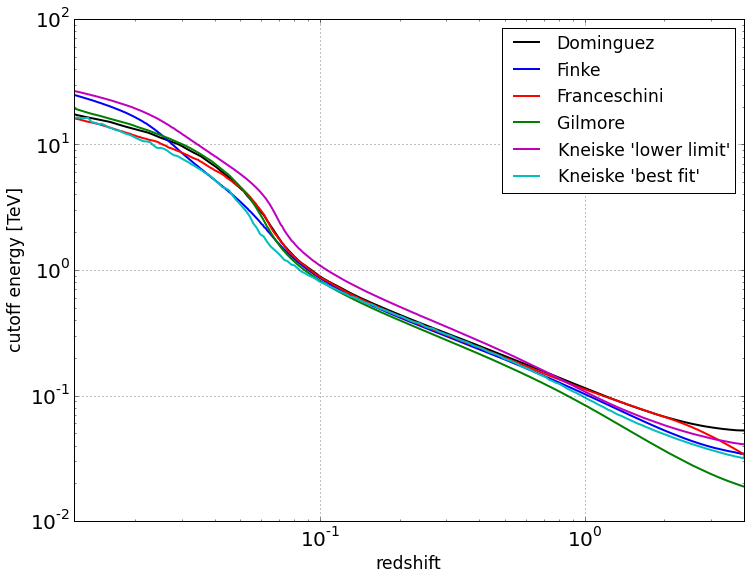

In [3]:
%matplotlib inline
from matplotlib.pyplot import figure, show, savefig
from numpy import loadtxt, size
from numpy.random import normal
from scipy.optimize import curve_fit
from src.analytic import Ethreshold_gg, Ecut
from src.read import path_to_fig_dir

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['ps.fonttype'] = 42

def E_cut(z,E0,z0,alpha):
    print E0, z0
    return E0*(z/z0)**alpha# TeV

fig = figure(figsize=(12,9))   
ax1 = fig.add_subplot(111)

zi,ctgg,best_fit,dominguez,finke,franceschini,gilmore,lower_limit = loadtxt("Results/Ecut.dat",unpack=True,usecols=[0,1,2,3,4,5,6,7])

# lisser les courbes => moyenne des points par N
N=4
z=zi[::N]/N
ct=ctgg[::N]/N
b=best_fit[::N]/N
d=dominguez[::N]/N
f1=finke[::N]/N
f2=franceschini[::N]/N
g=gilmore[::N]/N
l=lower_limit[::N]/N
for i in range(1,N):
   z=z+zi[i::N]/N
   ct=ct+ctgg[i::N]/N
   b=b+best_fit[i::N]/N
   d=d+dominguez[i::N]/N
   f1=f1+finke[i::N]/N
   f2=f2+franceschini[::N]/N
   g=g+gilmore[i::N]/N
   l=l+lower_limit[i::N]/N
   
ax1.plot(z,d/(1+z), drawstyle='-',color='k',linewidth=2,label="Dominguez")
ax1.plot(z,f1/(1+z),drawstyle='-',color='b',linewidth=2,label="Finke")
ax1.plot(z,f2/(1+z),drawstyle='-',color='r',linewidth=2,label="Franceschini")
ax1.plot(z,g/(1+z), drawstyle='-',color='g',linewidth=2,label="Gilmore")
ax1.plot(z,l/(1+z), drawstyle='-',color='m',linewidth=2,label="Kneiske 'lower limit'")

zi,ctgg,best_fit = loadtxt("Results/Ecut_Best_fit.dat",unpack=True,usecols=[0,1,2])
N=10
z=zi[::N]/N
ct=ctgg[::N]/N
b=best_fit[::N]/N
for i in range(1,N):
   z=z+zi[i::N]/N
   ct=ct+ctgg[i::N]/N
   b=b+best_fit[i::N]/N
ax1.plot(z,b/(1+z), drawstyle='-',color='c',linewidth=2,label="Kneiske 'best fit'")

#ax1.plot(z,E_cut(z,d[0],z[0],-0.5),"r--")
#ax1.plot(z,E_cut(z,d[122],z[122],-3),"r--")
#ax1.plot(z,E_cut(z,d[180],z[180],-0.5),"r--")

#ax1.plot(z,Ecut(z)/(1+z),"b--")

#ax1.plot(z,Ethreshold_gg(1)/(1+z)*1e-3,"m--")

#z_tab, E_save = loadtxt("Results/e_absorb.dat",unpack=True,usecols=[0,2])
#ax1.plot(z_tab,E_save,linestyle='--',color='k',label="Renaud")

#zi =[0.04,0.14,1,2]
#Ecut_simu=[20,15,0.4,0.2]
#ax1.scatter(zi,Ecut_simu, marker='+',color='r',label="simu")

ax1.legend(loc="best",fontsize="xx-large")
ax1.set_xscale('log')   
ax1.set_yscale('log')
ax1.set_xlim([min(z),max(z)])
#ax1.set_xlim([0.01,4])
#ax1.set_ylim([0.01,50])
ax1.grid(b=True,which='major')
ax1.set_xlabel("redshift",fontsize="xx-large")
ax1.set_ylabel("cutoff energy [TeV]",fontsize="xx-large")

savefig(path_to_fig_dir+"cutoff_energy.eps",bbox_inches='tight') 

show()

* analytic approximations obtained from graph above
$$E_{cut}(z) \simeq 54 \left(\frac{z}{10^{-3}}\right)^{-0.5} \textrm{ TeV}$$ 

$$E_{cut}(z) \simeq 3.4 \left(\frac{z}{0.06}\right)^{-3} \textrm{ TeV}$$ 

$$E_{cut}(z) \simeq 0.35 \left(\frac{z}{0.4}\right)^{-0.5} \textrm{ TeV}$$ 
* divergence at low redshift seems strange

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: RuntimeWarning: overflow encountered in exp


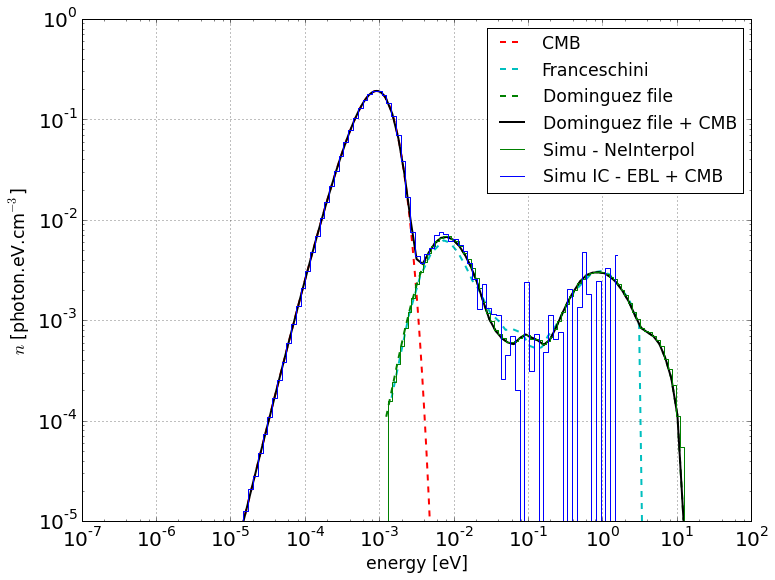

In [7]:
%matplotlib inline
from numpy import loadtxt, size, logspace, log10, histogram, exp, append
from  matplotlib.pyplot import figure, show
from src.analytic import *

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

def nCMB(E,z):
   kTcmb = k*Tcmb*erg*(1+z)
   return (hb*c*erg)**(-3) *(E/pi)**2 /(exp(E/kTcmb)-1)     

ax = figure(figsize=(12,9)).add_subplot(111)

E = logspace(-5,-2,100)
p=ax.plot(E,nCMB(E,0)*E**2,"--",color="r",linewidth=2,label="CMB")

hv,density = loadtxt("EBL_files/n_Fra.dat",unpack=True,usecols=[0,1])
ax.plot(hv,density*hv**2,"--c",linewidth=2,label="Franceschini")

z = loadtxt("EBL_files/z_Dominguez.dat",unpack=True,usecols=[0])
lamb,lambdaI = loadtxt("EBL_files/lambdaI_Dominguez.dat",unpack=True,usecols=[0,1])
hv = h*c/(lamb*1e-4)  # erg
density = 1e-6*(4*pi/c)*lambdaI/(hv**2) /erg *(1+z[0])**3
hv = hv[::-1] *erg
p=ax.plot(hv,density[::-1]*hv**2,"--",linewidth=2,color="g",label="Dominguez file")
max_Dom = max(density[::-1]*hv**2)

E = logspace(-5,log10(min(hv)),100)
ntot = append(nCMB(E,0)*E**2,density[::-1]*hv**2 + nCMB(hv,0)*hv**2)
E = append(E,hv)
p=ax.plot(E,ntot,"-",color="k",linewidth=2,label="Dominguez file + CMB")

# x est la grille de mon histogram
# y1 est mon propre histogramme
# y2 est la table de Dominguez interpolee
x,y1,y2 = loadtxt('Results/EBL_test.dat',unpack=True)
ax.plot(x,x*x*y2*max_Dom/max(y1*x**2),drawstyle='steps-mid',color='g',label='Simu - NeInterpol')
#ax.plot(x,x*x*y1*max_Dom/max(y1*x**2),drawstyle='steps-mid',color='r',label='Simu IC - EBL only')

# Partir de toutes les energies tirees, je construis un nouvel histogram avec python
#ee = loadtxt('Results/EBL_test.txt',unpack=True)
#hist,xbin = histogram(ee*511.e3,bins=x,density=True)
#hist = hist/max(hist) *max_Dom
#xx  = x[0:len(x)-1]
#ax.plot(xx,xx*xx*hist*max_Dom/max(hist*xx**2),drawstyle='steps-mid',color='r',label='Histo python')

nbBins = 99
#z,Esimu = loadtxt("Results/EBL_test.dat",unpack=True)
#bins=logspace(log10(min(Esimu)),log10(max(Esimu)),nbBins+1)
#N,Eebl=histogram(Esimu,bins,density=True)
#E=(Eebl[1:nbBins+1]*Eebl[0:nbBins])**0.5
#ax.plot(E,N*E**2*max_Dom/max(N*E**2),drawstyle='steps-mid',color='r',label='Simu - EBL only')

max_Dom = max(ntot)
z,Esimu = loadtxt("Results/EBL_CMB_test.dat",unpack=True)
bins=logspace(log10(min(Esimu)),log10(max(Esimu)),nbBins+1)
N,Eebl=histogram(Esimu,bins,density=True)
E=(Eebl[1:nbBins+1]*Eebl[0:nbBins])**0.5
ax.plot(E,N*E**2*max_Dom/max(N*E**2),drawstyle='steps-mid',color='b',label='Simu IC - EBL + CMB')

#nbBins = 99
#z,Esimu = loadtxt("Results/EBL_test-ter.dat",unpack=True)
#bins=logspace(log10(min(Esimu)),log10(max(Esimu)),nbBins+1)
#N,Eebl=histogram(Esimu,bins,density=True)
#E=(Eebl[1:nbBins+1]*Eebl[0:nbBins])**0.5
#ax.plot(E,N*E**2*max_Dom/max(N*E**2),drawstyle='steps-mid',color='b',label='Numpy histo 2')

ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(b=True,which='major')
ax.legend(loc="best",fontsize="xx-large")#,frameon=False,framealpha=0.5)
ax.set_xlabel("energy [eV]",fontsize="xx-large")
#ax.set_xlim([1e-4,20])
ax.set_ylim([1e-5,1])
ax.set_ylabel("$n$ [photon.eV.cm$^{-3}$]",fontsize="xx-large")

show()

## Target photons energy versus gamma-rays energy

3.8678424795 0.115220741159 -0.9


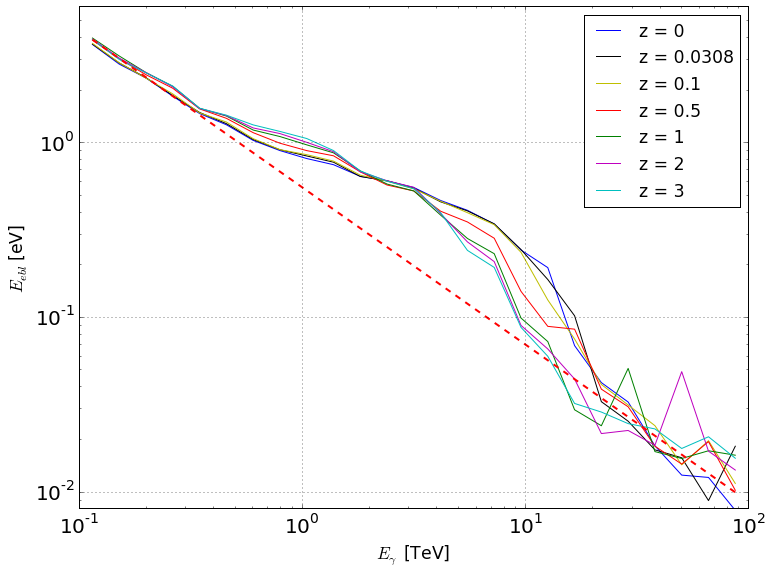

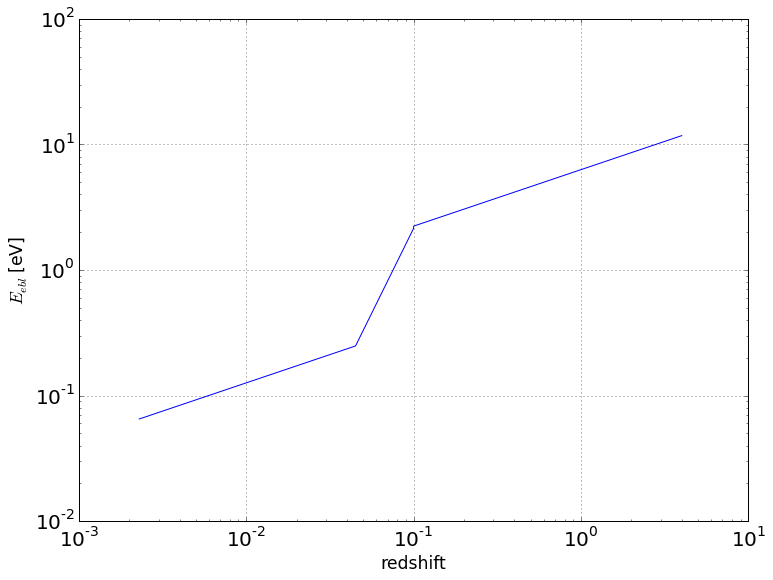

In [6]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import arange

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

def Eebl(Egamma,Eebl0,E0,alpha):
   print Eebl0, E0, alpha 
   return Eebl0*(Egamma/E0)**alpha
 
fig1 = figure(figsize=(12,9))
ax11 = fig1.add_subplot(111)

# pour moyenner sur N points!
N=400

color=['b','k','y','r','g','m','c']
labels=["0","0.0308","0.1","0.5","1","2","3"]
ind=1
for lab in labels:
   e,f=loadtxt('Results/Eebl.dat',unpack=True,usecols=[0,ind])
   em=e[::N]/N
   fm=f[::N]/N
   for i in range(1,N):
      em=em+e[i::N]/N
      fm=fm+f[i::N]/N
   p = ax11.plot(em,fm,color[ind-1],label="z = "+lab) 
   ind=ind+1       

ax11.plot(em,Eebl(em,fm[0],em[0],-0.9),"r--",linewidth=2)

ax11.legend(loc="best",fontsize="xx-large")
ax11.grid(b=True,which='major')
ax11.set_ylim([8e-3,6])
ax11.set_xscale('log')
ax11.set_yscale('log')
ax11.set_xlabel("$E_\gamma$ [TeV]",fontsize="xx-large")
ax11.set_ylabel("$E_{ebl}$ [eV]",fontsize="xx-large")

nz = 5000
zmin = 2.3e-3
zmax = 4.
z = zmin*(zmax/zmin)**(arange(nz)/(nz-1.))

fig = figure(figsize=(12,9))   
ax = fig.add_subplot(111)

ax.plot(z,Etarget(Ecut(z)))

ax.grid(b=True,which='major')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("redshift",fontsize="xx-large")
ax.set_ylabel("$E_{ebl}$ [eV]",fontsize="xx-large")

show()


* Target photon energy does not depends on the redshift
* Analytic approximation:
$$ E_{ebl} \simeq 3.9 \left(\frac{E_\gamma}{0.1\textrm{TeV}}\right)^{-0.9} \textrm{ eV}$$
* At high energy (>10TeV), which corresponds to the $E_{cut}$ at low redshift, $E_{ebl}<0.1$eV
* This $E_{ebl}$ corresond to the first peak of the EBL , but the density given by the models could change with a factor 4 on this peak 
* This explains the differences observed